In [2]:
import numpy as np
import cv2
import os

In [3]:
labels = np.array(['none', 'next', 'prev', 'play pause', 'volume up', 'volume down'])
dataset_path = 'Dataset'
dataset_count = 150

In [4]:
for label in labels:
    try:
        path = os.path.join(dataset_path,label)
        os.makedirs(path)
    except:
        pass




In [6]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision


In [9]:
model_path = os.path.abspath("android_control_model.task")
recognizer = vision.GestureRecognizer.create_from_model_path(model_path)

cap = cv2.VideoCapture(1)
while True:
    ret,image = cap.read()
    predImage = mp.Image(image_format=mp.ImageFormat.SRGB, data=image)
    result = recognizer.recognize(predImage)
    if len(result.gestures) != 0:
        gesture = result.gestures[0][0]
        cv2.putText(image,'{}'.format(gesture.category_name),(120,200),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),4,cv2.LINE_AA)
    if len(result.gestures) != 0 :
        cv2.imshow('cv feed', image)
        #cv2.waitKey(0)
    else:
        cv2.imshow('cv feed', image)
    
    if cv2.waitKey(100) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
    

In [5]:
cap = cv2.VideoCapture(1)
ret, frame = cap.read()
for label in labels:
    for frame_num in range(dataset_count+1):
        ret, frame = cap.read()
        if frame_num == 0:
            cv2.putText(frame,'STARTING COLLECTION',(120,200),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),4,cv2.LINE_AA)
            
        else:
            cv2.imwrite(os.path.join(dataset_path,label,'{}.jpg'.format(frame_num)),frame)
            cv2.putText(frame,'Collecting frame for {}'.format(label),(15,12),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1,cv2.LINE_AA)
        
        cv2.imshow('open cv feed',frame)
        if frame_num == 0:
           cv2.waitKey(5000)
        else:
           cv2.waitKey(100)
         
        if cv2.waitKey(1) & 0xFF == ord('q'):
         break

cap.release()
cv2.destroyAllWindows()

            



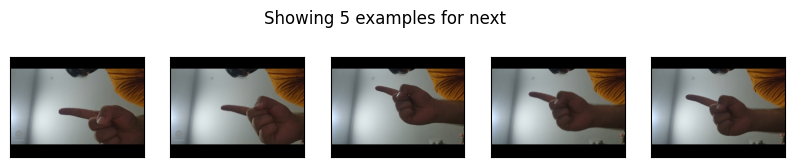

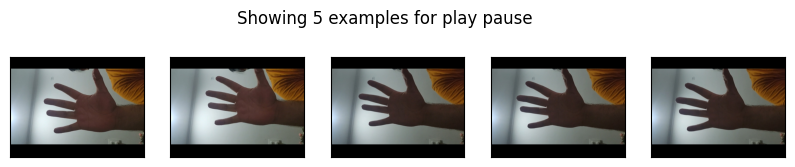

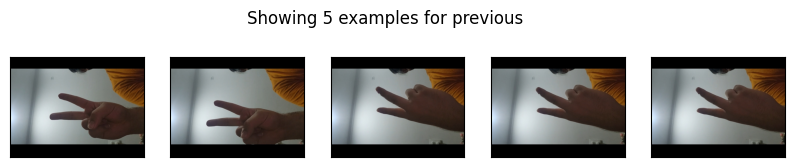

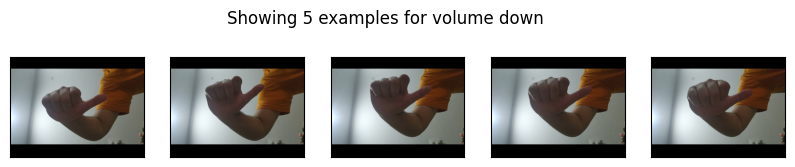

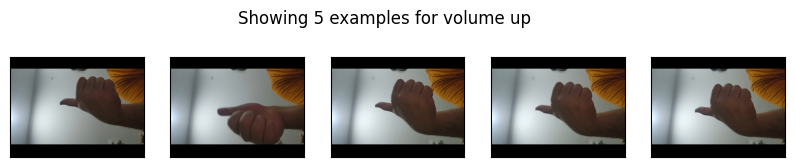

In [1]:
import matplotlib.pyplot as plt
import os

NUM_EXAMPLES = 5
IMAGES_PATH = "Dataset"

# Get the list of labels from the list of folder names.
labels = []
for i in os.listdir(IMAGES_PATH):
  if os.path.isdir(os.path.join(IMAGES_PATH, i)):
    labels.append(i)

# Show the images.
for label in labels:
  label_dir = os.path.join(IMAGES_PATH, label)
  example_filenames = os.listdir(label_dir)[:NUM_EXAMPLES]
  fig, axs = plt.subplots(1, NUM_EXAMPLES, figsize=(10,2))
  for i in range(NUM_EXAMPLES):
    axs[i].imshow(plt.imread(os.path.join(label_dir, example_filenames[i])))
    axs[i].get_xaxis().set_visible(False)
    axs[i].get_yaxis().set_visible(False)
  fig.suptitle(f'Showing {NUM_EXAMPLES} examples for {label}')

plt.show()

In [10]:
%pip install tensorflow


  Using cached tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
Using cached tensorflow-2.16.1-cp311-cp311-win_amd64.whl (2.1 kB)


In [3]:
%pip install tensorflow==2.15.0


  Using cached keras-2.15.0-py3-none-any.whl.metadata (2.4 kB)
  Using cached google_auth-2.29.0-py2.py3-none-any.whl.metadata (4.7 kB)
  Using cached cachetools-5.3.3-py3-none-any.whl.metadata (5.3 kB)
  Using cached pyasn1_modules-0.4.0-py3-none-any.whl.metadata (3.4 kB)
  Using cached rsa-4.9-py3-none-any.whl.metadata (4.2 kB)
  Using cached requests_oauthlib-2.0.0-py2.py3-none-any.whl.metadata (11 kB)
  Using cached pyasn1-0.6.0-py2.py3-none-any.whl.metadata (8.3 kB)
  Using cached oauthlib-3.2.2-py3-none-any.whl.metadata (7.5 kB)
   ---------------------------------------- 0.0/300.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/300.9 MB 9.6 MB/s eta 0:00:32
   ---------------------------------------- 2.3/300.9 MB 28.9 MB/s eta 0:00:11
    --------------------------------------- 4.5/300.9 MB 40.8 MB/s eta 0:00:08
    --------------------------------------- 6.2/300.9 MB 39.4 MB/s eta 0:00:08
   - -------------------------------------- 8.2/300.9 MB 40.3 MB/s eta 0

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.


In [4]:
import tensorflow as tf

In [7]:
convertor = tf.lite.TFLiteConverter.from_saved_model('')
tf_lite_model = convertor.convert()

OSError: SavedModel file does not exist at: \{saved_model.pbtxt|saved_model.pb}